In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [8]:
df=pd.read_excel("personal finance data.xlsx")
df=df.rename(columns={'Date / Time':'Date', 'Sub category':'Subcategory', 'Income/Expense':'Type', 'Debit/Credit':'Amount'})
df['Category'] = df['Category'].str.strip().str.title()


In [9]:
df.head()

,Date,Mode,Category,Subcategory,Type,Amount
0,2021-01-01 21:45:00,CUB - online payment,Allowance,From dad,Income,8000.0
1,2021-01-01 21:46:00,CUB - online payment,Food,Snacks,Expense,85.0
2,2021-01-03 18:21:00,CUB - online payment,Other,From dad,Income,500.0
3,2021-01-03 18:22:00,CUB - online payment,Household,Stuffs,Expense,6667.0
4,2021-01-03 18:56:00,CUB - online payment,Transportation,Metro,Expense,30.0


In [10]:
#Extracting Features
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].dt.dayofweek
df['Month']=df['Date'].dt.month
df['AmountLog']=np.log1p(df['Amount'])
le_type=LabelEncoder()
df['Type_encoded']=le_type.fit_transform(df['Type'])
le_cat=LabelEncoder()
df['Category_Encoded']=le_cat.fit_transform(df['Category'])

x=df[['AmountLog', 'Day', 'Month', 'Type_encoded']]
y=df['Category_Encoded']

In [11]:
#Training the Model
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)



,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred, zero_division=0))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         4
           3       0.70      0.95      0.81        20
           4       0.50      0.25      0.33         4
           5       0.78      0.64      0.70        11
           6       1.00      1.00      1.00         3
           7       0.00      0.00      0.00         2

    accuracy                           0.67        45
   macro avg       0.43      0.41      0.41        45
weighted avg       0.61      0.67      0.63        45

0.6666666666666666


In [13]:
#Predicting new transactions
new_transac=pd.DataFrame({'AmountLog':[np.log1p(450)], 'Day':[2], 'Month':[6], 'Type_encoded':[le_type.transform(['Expense'])[0]]})
pred=model.predict(new_transac)
print("Predicted Category:",le_cat.inverse_transform(pred)[0])

Predicted Category: Food


<function matplotlib.pyplot.show(close=None, block=None)>

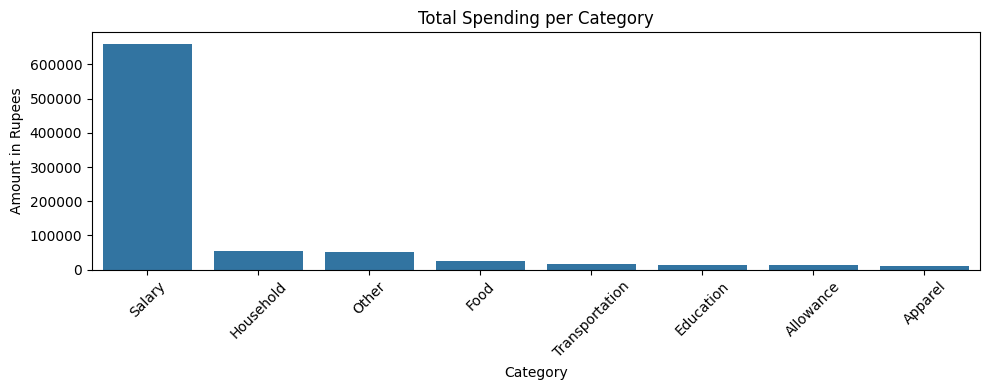

In [14]:
#Visualizing Spending 
categories=df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,4))
sns.barplot(x=categories.index, y=categories.values)
plt.xticks(rotation=45)
plt.title("Total Spending per Category")
plt.ylabel("Amount in Rupees")
plt.tight_layout()
plt.show
